# Deep learning

## Initialing

In [5]:
learning = False
normalization = True
randomSplit = False
sr = 100
shuffle = True
numClasses = 5
batch = 10
epochs = 100
learning_rate = 0.001
trainKoef = 0.9
randomSeed = 0

In [6]:
numThreads = 4

In [7]:
exp = lambda t: 2 ** t
oheToInt = lambda t: np.sum(np.array([exp(i) for i in np.where(np.array(t) == 1)[0]])) 
readData = lambda i: wfdb.rdsamp(path+filenames[i])[0]
myRound = lambda x: 1 if x>=0.5 else 0

In [8]:
def CNN():
    xInput = Input(shape=(sr*10, 12))
    x = Conv1D(256, 11, padding='same', input_shape=(sr*10, 12), activation='relu')(xInput)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(512, 9, padding='same', input_shape=(sr*10, 12), activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(1024, 7, padding='same', input_shape=(sr*10, 12), activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(numClasses, activation='sigmoid')(x)
    model = Model(inputs=xInput,outputs = x)
    model._name = 'CNN'
    return model

def CNN1():
    model = keras.Sequential()

    # Add the input layer
    model.add(keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', input_shape=(sr*10, 12)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling1D(pool_size=2))

    # Add three more convolutional layers with batch normalization and ReLU activation functions
    model.add(keras.layers.Conv1D(filters=128, kernel_size=5, padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling1D(pool_size=2))

    model.add(keras.layers.Conv1D(filters=256, kernel_size=5, padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling1D(pool_size=2))

    model.add(keras.layers.Conv1D(filters=512, kernel_size=5, padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling1D(pool_size=2))

    # Add a flatten layer to convert the output to a 1D vector
    model.add(keras.layers.Flatten())

    # Add two fully connected layers with batch normalization and ReLU activation functions
    model.add(keras.layers.Dense(units=512))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(rate=0.2))

    model.add(keras.layers.Dense(units=256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(rate=0.2))

    # Add the output layer
    model.add(keras.layers.Dense(units=5, activation='softmax'))
    return model

def DNN():
    # Create a sequential model
    model = keras.Sequential()

    # Add the input layer
    model.add(keras.layers.Flatten(input_shape=(sr*10, 12)))

    # Add three hidden layers with batch normalization and ReLU activation functions
    model.add(keras.layers.Dense(units=512))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(rate=0.2))

    model.add(keras.layers.Dense(units=256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(rate=0.2))

    model.add(keras.layers.Dense(units=128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(rate=0.2))

    # Add the output layer
    model.add(keras.layers.Dense(units=5, activation='softmax'))
    return model


def VGG16():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding='same',  input_shape=(sr*10,12)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(Conv1D(filters=128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=512, kernel_size=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=512, kernel_size=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(numClasses, activation='sigmoid'))
    model._name = 'VGG16'
    return model

def CBB():
    xInput = Input(shape=(sr*10, 12))
    x = Conv1D(256, 11, padding='same', input_shape=(sr*10, 12), activation='relu')(xInput)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(GRU(512, return_sequences=True))(x)
    x = GlobalAveragePooling1D()(x) 
    x = Dense(numClasses, activation='sigmoid')(x)
    model = Model(inputs=xInput,outputs = x) 
    model._name = 'CBB'
    return model

def AlexNet(multiclass = False, output=True):
    model=Sequential()
    model.add(Input(shape=(sr*10,12)))
    model.add(Conv1D(filters=96, kernel_size=11, padding='same'))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=256, kernel_size=5, padding='same'))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(filters=384, padding='same', activation='relu', kernel_size=3))
    model.add(Conv1D(filters=384, activation='relu', kernel_size=3))
    model.add(Conv1D(filters=256, kernel_size=3))
    model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(numClasses, activation='sigmoid'))
    model._name = 'AlexNet'
    return model

def LG():
    model = Sequential()
    model.add(Input(shape=(sr*10,12)))
    model.add(LSTM(256, return_sequences=True))
    model.add(GRU(384, return_sequences=True))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(numClasses, activation='sigmoid'))
    model._name = 'LG'
    return model

def SCNN():
    model = Sequential()
    model.add(Input(shape=(sr*10, 12)))
    model.add(SeparableConv1D (256, 11, padding='same', depth_multiplier=5, input_shape=(sr*10, 12), activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(SeparableConv1D (512, 9, padding='same', depth_multiplier=5, input_shape=(sr*10, 12), activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(SeparableConv1D (1024, 7, padding='same', depth_multiplier=5, input_shape=(sr*10, 12), activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(numClasses, activation='sigmoid'))
    model._name = 'SCNN'
    return model

def inceptionBlock(prevLayer):  
    conv1 = Conv1D(filters = 64, kernel_size = 1, padding = 'same')(prevLayer)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv3 = Conv1D(filters = 64, kernel_size = 1, padding = 'same')(prevLayer)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv1D(filters = 64, kernel_size = 3, padding = 'same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv5 = Conv1D(filters = 64, kernel_size = 1, padding = 'same')(prevLayer)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv1D(filters = 64, kernel_size = 5, padding = 'same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    pool = MaxPool1D(pool_size=3, strides=1, padding='same')(prevLayer)
    convmax = Conv1D(filters = 64, kernel_size = 1, padding = 'same')(pool)
    convmax = BatchNormalization()(convmax)
    convmax = Activation('relu')(convmax)
    layerOut = concatenate([conv1, conv3, conv5, convmax], axis=1)
    return layerOut

def Inception():
    xInput = Input((sr*10,12)) 
    x = ZeroPadding1D(3)(xInput)
    x = Conv1D(filters = 64, kernel_size = 7, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3, strides=2, padding='same')(x)
    x = Conv1D(filters = 64, kernel_size = 1, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = inceptionBlock(x)
    x = inceptionBlock(x)
    x = MaxPool1D(pool_size=7, strides=2, padding='same')(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(numClasses, activation='sigmoid')(x)
    model = Model(inputs=xInput,outputs = x)
    model._name = 'Inception'
    return model

def L():
    model = Sequential()
    model.add(Input(shape=(sr*10, 12)))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(numClasses, activation='sigmoid'))
    model._name = 'LSTM'
    return model

def G(multiclass = False, output=True):
    model = Sequential()
    model.add(Input(shape=(sr*10, 12)))
    model.add(GRU(256, return_sequences=True))
    model.add(GlobalAveragePooling1D())  
    model.add(Dense(numClasses, activation='sigmoid'))
    model._name = 'GRU'
    return model

def Xception():
    xInput = Input((sr*10, 12))
    x = Conv1D(32, 3, strides=2, use_bias=False)(xInput)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(64, 3, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    residual = Conv1D(128, 1, strides=2,padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = SeparableConv1D(128, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv1D(128, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(3, strides=2, padding='same')(x)
    x = layers.add([x, residual])
    residual = Conv1D(256, 1, strides=2, padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = Activation('relu')(x)
    x = SeparableConv1D(256, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv1D(256, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(3, strides=2, padding='same')(x)
    x = layers.add([x, residual])
    residual = Conv1D(728, 1, strides=2, padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = Activation('relu')(x)
    x = SeparableConv1D(728, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv1D(728, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(3, strides=2, padding='same')(x)
    x = layers.add([x, residual])
    for i in range(8):
        residual = x
        x = Activation('relu')(x)
        x = SeparableConv1D(728, 3, padding='same', use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = SeparableConv1D(728, 3, padding='same', use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = SeparableConv1D(728, 3, padding='same', use_bias=False)(x)
        x = BatchNormalization()(x)
        x = layers.add([x, residual])
    residual = Conv1D(1024, 1, strides=2,padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = Activation('relu')(x)
    x = SeparableConv1D(728, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv1D(1024, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(3, strides=2, padding='same')(x)
    x = layers.add([x, residual])
    x = SeparableConv1D(1536, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv1D(2048, 3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling1D()(x) 
    x = Dense(numClasses, activation='sigmoid')(x)
    model = Model(inputs=xInput,outputs = x)   
    model._name = 'Xception'
    return model

In [9]:
def loadModel(modelName, inInput = False):
    if not inInput:
        if normalization and randomSplit:
            return load_model('/kaggle/input/models/NR'+modelName+'.h5')
        elif normalization:
            return load_model('/kaggle/input/models/WN'+modelName+'.h5')
        elif randomSplit:
            return load_model('/kaggle/input/models/RND'+modelName+'.h5')
        else:
            return load_model("/kaggle/input/models/"+modelName+'.h5')
    else:
        if normalization and randomSplit:
            return load_model(modelPath+'NR'+modelName+'.h5')
        elif normalization:
            return load_model(modelPath+'WN'+modelName+'.h5')
        elif randomSplit:
            return load_model(modelPath+'RND'+modelName+'.h5')
        else:
            return load_model(modelPath+modelName+'.h5')

def saveModel(model):
    if normalization and randomSplit:
        model.save('NR'+model._name+'.h5')
    elif normalization:
        model.save('WN'+model._name+'.h5')
    elif randomSplit:
        model.save('RND'+model._name+'.h5')
    else:
        model.save(model._name+'.h5')
        
def checkExist(modelName, inInput = False):
    if not inInput:
        if normalization and randomSplit:
            return os.path.exists('/kaggle/input/models/NR'+modelName+'.h5')
        elif normalization:
            return os.path.exists('/kaggle/input/models/WN'+modelName+'.h5')
        elif randomSplit:
            return os.path.exists('/kaggle/input/models/RND'+modelName+'.h5')
        else:
            return os.path.exists('/kaggle/input/models/'+modelName+'.h5')
    else:
        if normalization and randomSplit:
            return os.path.exists(modelPath+'NR'+modelName+'.h5')
        elif normalization:
            return os.path.exists(modelPath+'WN'+modelName+'.h5')
        elif randomSplit:
            return os.path.exists(modelPath+'RND'+modelName+'.h5')
        else:
            return os.path.exists(modelPath+modelName+'.h5')

In [10]:
def subsets(S):
    sets = []
    lenS = len(S)
    for i in range(1, 1 << lenS):
        subset = [S[bit] for bit in range(lenS) if i & (1 << bit )]
        sets.append(subset)
    return sets

def fullCombo(n):
    indexes = [i for i in range(n)]
    return subsets(indexes)

def reqCombo(n, k):
    return list(filter(lambda x: len(x)==k, fullCombo(n)))

In [11]:
import os
import pandas as pd
import numpy as np
import wfdb
from sklearn.model_selection import train_test_split
import ast
import warnings
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow_addons as tfa
import random as rd
from joblib import Parallel, delayed
from IPython.display import display
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy, FalseNegatives, FalsePositives, TrueNegatives, TruePositives, Recall, Precision, AUC
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import concatenate, Convolution1D, SeparableConv1D, Concatenate, Add, ZeroPadding1D, GlobalAveragePooling1D, MaxPool1D, Activation 
from tensorflow.keras.layers import Input, GRU, SimpleRNN, GlobalMaxPooling1D, ReLU, BatchNormalization, Lambda, Dense, Dropout, Flatten, Conv1D 
from tensorflow.keras.layers import AveragePooling1D, MaxPooling1D, BatchNormalization, Bidirectional, LSTM, LocallyConnected1D, LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow import reduce_mean
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras import layers,utils
from sklearn import preprocessing
from sklearn.metrics import multilabel_confusion_matrix,ConfusionMatrixDisplay
from pandas import DataFrame
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef,log_loss
from sklearn import metrics
from scipy import stats
from vecstack import stacking
import pickle
%load_ext autoreload
%autoreload
%reload_ext autoreload
%matplotlib inline
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [12]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Data reading  and preprocessing

In [13]:
path = '/kaggle/input/ptb-xl-102/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/'
modelPath = '/kaggle/input/ptbxl-with-additional-data/'

Y = pd.read_csv(path+ 'ptbxl_database.csv', index_col = 'ecg_id')

Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

agg_df = pd.read_csv(path+ 'scp_statements.csv', index_col = 0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y.reset_index(inplace=True)

y = []
subClasses = ['NORM', 'MI', 'STTC', 'CD', 'HYP']

for i in range(len(Y)):
    y.append([])
    for subClass in subClasses:
        found = False
        for classCase in Y['diagnostic_superclass'][i]:
            if subClass == classCase:
                found = True
                break
        y[i].append(1 if found else 0) 
        
filenames = Y.filename_lr if sr == 100 else Y.filename_hr
        
#X = Parallel(n_jobs=4)(delayed(readData)(i) for i in range(len(Y)))
X = pickle.load(open('/kaggle/input/x-pickle/X.pkl', 'rb'))
X = np.array(X)
if normalization:
    X = (X - X.mean(axis = 0))/X.std(axis = 0)
    
if randomSplit:
    rd.seed(randomSeed)
    allIndexes = [i for i in range(len(y))]
    indexes = []
    arrayLength = len(allIndexes)
    trainEnd = int(arrayLength*trainKoef)
    for i in range(trainEnd):
        index = rd.randint(0, len(allIndexes)-1)
        indexes.append(allIndexes[index])
        allIndexes.pop(index)
    Xtrain =[X[indexes[i]] for i in range(len(indexes))]
    Ytrain = [y[indexes[i]] for i in range(len(indexes))]
    Xtest = [X[allIndexes[i]] for i in range(len(allIndexes))]
    Ytest = [y[allIndexes[i]] for i in range(len(allIndexes))]
else:
    indexes = []
    for i in range(len(y)):
        if sum(y[i])==0:
            indexes.append(i)
    arrayLength = len(indexes)
    trainEnd = int(arrayLength*trainKoef)
    Xtrain =[X[indexes[i]] for i in range(trainEnd)]
    Xtest = [X[indexes[i]] for i in range(trainEnd, arrayLength)]
    Ytrain = [y[indexes[i]] for i in range(trainEnd)]
    Ytest = [y[indexes[i]] for i in range(trainEnd, arrayLength)]

    for k in range(1,numClasses+1):
        for combo in reqCombo(numClasses,k):    
            indexes = []
            for i in range(len(y)):
                if sum(y[i])==k:
                    mustAdd = True
                    for j in combo:
                        if (y[i][j]==0):
                            mustAdd = False
                    if mustAdd:
                        indexes.append(i)
            arrayLength = len(indexes)
            trainEnd = int(arrayLength*trainKoef)
            Xtrain +=[X[indexes[i]] for i in range(trainEnd)]
            Xtest += [X[indexes[i]] for i in range(trainEnd, arrayLength)]
            Ytrain += [y[indexes[i]] for i in range(trainEnd)]
            Ytest += [y[indexes[i]] for i in range(trainEnd, arrayLength)]


Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
Ytrain = np.array(Ytrain, dtype=int)
Ytest =  np.array(Ytest, dtype=int)

Xtrain, Xval, Ytrain, Yval  = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=1)

del y, X



## Learning models and demonstration of results

In [14]:
def buildModelWithInfo(model, Xtrain = Xtrain, Xtest = Xtest, Ytrain = Ytrain, Ytest = Ytest, Xval = Xval, Yval = Yval,learning = learning):
    testMetrics = None
    history = None
    if checkExist(model._name, True) and not checkExist(model._name): 
        saveModel(loadModel(model._name, True))
    if not checkExist(model._name) or learning:
        model.compile(
        loss=BinaryCrossentropy(), 
        optimizer=Nadam(learning_rate=learning_rate), 
        metrics=[AUC(name="AUC",multi_label=True),F1Score(numClasses,"micro",name="F1")]
        )
        #reduce_lr = ReduceLROnPlateau(monitor='val_AUC', factor=0.1, patience=2, mode='max',min_delta=0.0001, cooldown=0, min_lr=0, verbose=1)
        early_stop = EarlyStopping(monitor='loss', mode='max', patience=3, verbose=1)
        saveBest = ModelCheckpoint(filepath='best'+model._name+'.h5',monitor='val_AUC',mode='max',save_best_only=True,save_weights_only=False)
        history = model.fit(Xtrain, Ytrain, batch_size=batch, epochs=epochs, shuffle = True, validation_data=(Xval,Yval), callbacks=[early_stop,saveBest])
        
        if os.path.exists('best'+model._name+'.h5'):
            modelName = model._name
            model = load_model('best'+model._name  + '.h5')
            model._name = modelName
            os.remove('best'+model._name+'.h5')
        testMetrics = model.evaluate(Xtest, Ytest, verbose = 1 if learning else 0)
        model.auc = round(testMetrics[1], 4)
        model.f1 = round(testMetrics[2], 4)   
        if checkExist(model._name):
            _model = loadModel(model._name)
            _auc = round(_model.evaluate(Xtest, Ytest)[1], 4)  
            if model.auc>_auc:
                saveModel(model)
        else:
            saveModel(model)
    else:      
        model = loadModel(model._name)
        testMetrics = model.evaluate(Xtest, Ytest, verbose = 1 if learning else 0)
        model.auc = round(testMetrics[1], 4)
        model.f1 = round(testMetrics[2], 4)
    
    model.pred = model.predict(Xtest)      
    predicts = model.pred.copy()
    y_pred=np.argmax(predicts, axis=1)
    y_test=np.argmax(Ytest, axis=1)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    for i in range(len(predicts)):
        predicts[i] = list(map(myRound, predicts[i]))
    print(model._name)
    print("AUC: "+'%.4f' % model.auc)
    print("F1: "+'%.4f' % model.f1)
    results.append([model._name, [model.auc,model.f1]])
    
    confMatrix = multilabel_confusion_matrix(predicts, Ytest)
    f, axes = plt.subplots(1, 5, figsize=(25, 3))
    for i in range(numClasses):
        disp = ConfusionMatrixDisplay(confMatrix[i])
        disp.plot(ax=axes[i])
        disp.ax_.set_title(subClasses[i])  
    return model, history

In [15]:
results = []

In [16]:
Y = np.vstack([Ytrain, Ytest])

In [17]:
indexes = [0,1,2,3,4]
sums = [0]*5
for i in range(len(Y)):
    for j in range(5):
        sums[j]+= Y[i][j]
dist = np.array(sums)/len(Y)        

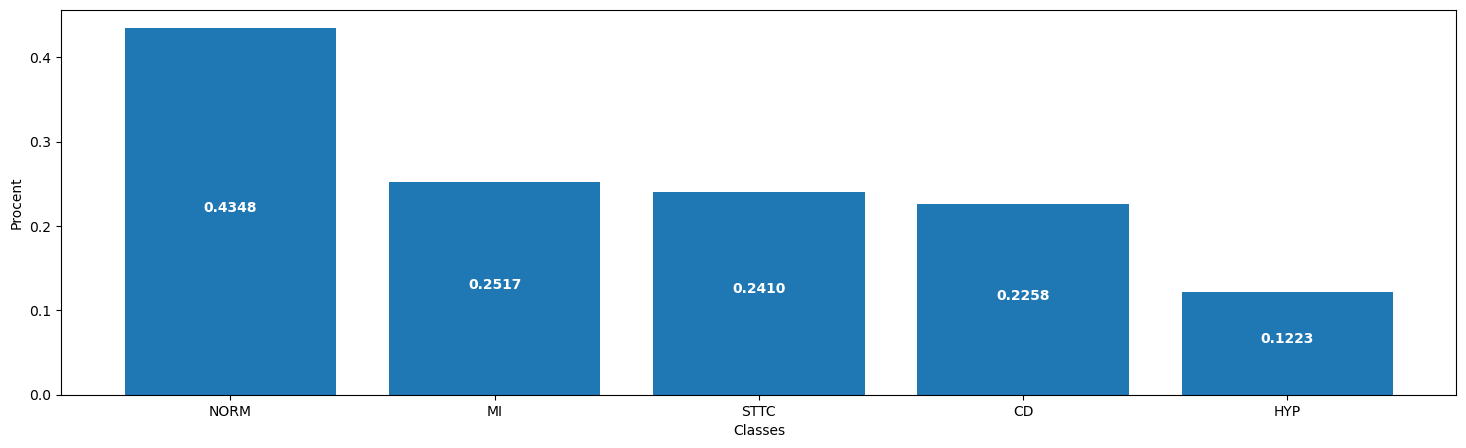

In [18]:
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(indexes,dist)
plt.xticks(indexes, subClasses)
plt.ylabel("Procent")
plt.xlabel("Classes")
for i, perf in enumerate(dist):
    ax.text(i, dist[i]/2, '%.4f' % perf , color='white', ha='center', fontweight='bold')
plt.show()

In [19]:
models = []

In [17]:
! pip install imblearn

69/69 [==============================] - 56s 805ms/step
0.7154582763337893
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       997
           1       0.88      0.57      0.69       551
           2       0.68      0.59      0.63       390
           3       0.44      0.81      0.57       201
           4       0.15      0.46      0.23        54

    accuracy                           0.72      2193
   macro avg       0.60      0.65      0.60      2193
weighted avg       0.78      0.72      0.73      2193

CNN
AUC: 0.9363
F1: 0.7309
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 07:58:46         5317
variables.h5                                   2023-04-29 07:58:46     58742560
metadata.json                                  2023-04-29 07:58:46           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loa

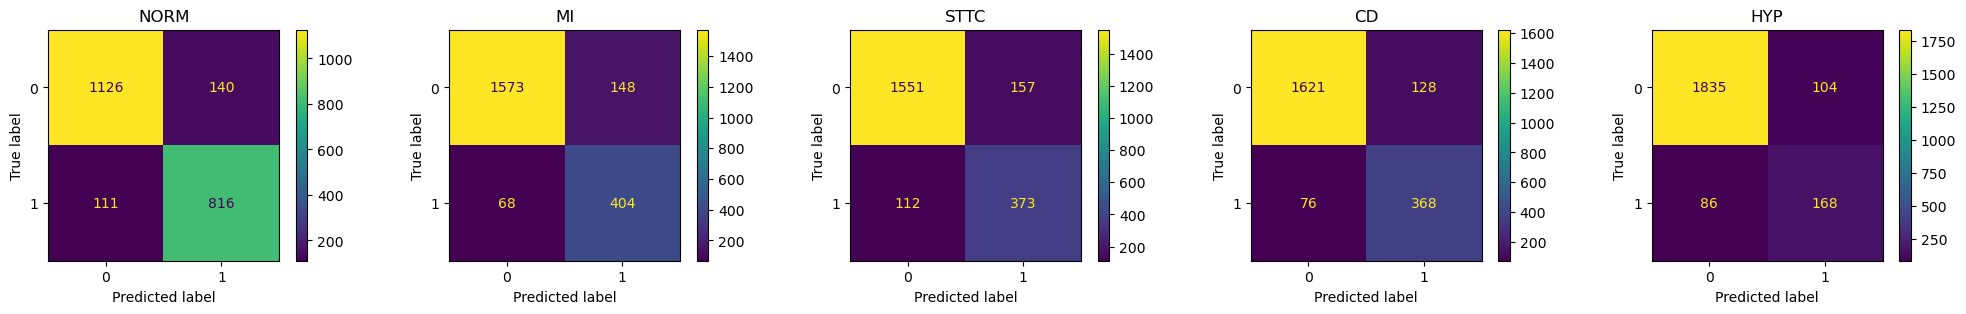

In [18]:
model_CNN = CNN()
model_CNN, history_CNN = buildModelWithInfo(model_CNN)
if os.path.isfile('/kaggle/input/models/history_CNN.pkl') == False:
    pickle.dump(history_CNN, open('/kaggle/input/models/history_CNN.pkl', 'wb'))
else:
    history_CNN = pickle.load(open('/kaggle/input/models/history_CNN.pkl', 'rb'))
models.append(model_CNN)

In [19]:
model_CNN.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 12)]        0         
                                                                 
 conv1d (Conv1D)             (None, 1000, 256)         34048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 256)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 512)          1180160   
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 250, 512)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 1024)         3671040 

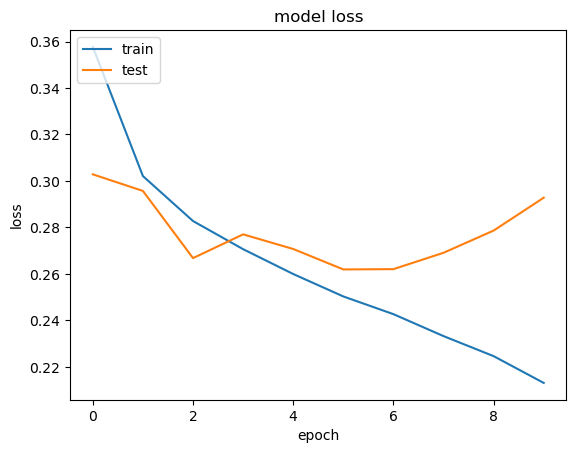

In [20]:
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 47s 679ms/step
0.7332421340629275
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       997
           1       0.79      0.66      0.72       551
           2       0.71      0.57      0.63       390
           3       0.45      0.83      0.58       201
           4       0.18      0.31      0.23        54

    accuracy                           0.73      2193
   macro avg       0.60      0.64      0.60      2193
weighted avg       0.77      0.73      0.74      2193

SCNN
AUC: 0.9390
F1: 0.7292
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 08:07:32         5599
variables.h5                                   2023-04-29 08:07:32     40009256
metadata.json                                  2023-04-29 08:07:32           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) lo

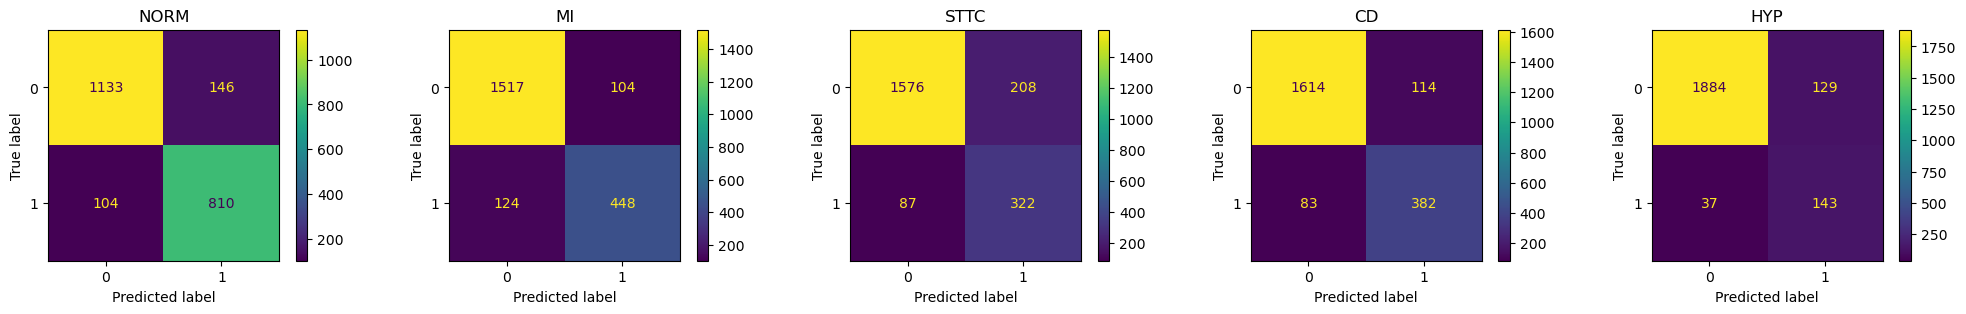

In [21]:
model_SCNN = SCNN()
model_SCNN, history_SCNN = buildModelWithInfo(model_SCNN)
if os.path.isfile('/kaggle/input/models/history_SCNN.pkl') == False:
    pickle.dump(history_SCNN, open('/kaggle/input/models/history_SCNN.pkl', 'wb'))
else:
    history_SCNN = pickle.load(open('/kaggle/input/models/history_SCNN.pkl', 'rb'))
models.append(model_SCNN)

In [22]:
model_SCNN.summary()

Model: "SCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv1d (Separable  (None, 1000, 256)        16276     
 Conv1D)                                                         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 500, 256)         0         
 1D)                                                             
                                                                 
 separable_conv1d_1 (Separab  (None, 500, 512)         667392    
 leConv1D)                                                       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 250, 512)         0         
 1D)                                                             
                                                                 
 separable_conv1d_2 (Separab  (None, 250, 1024)        2640384

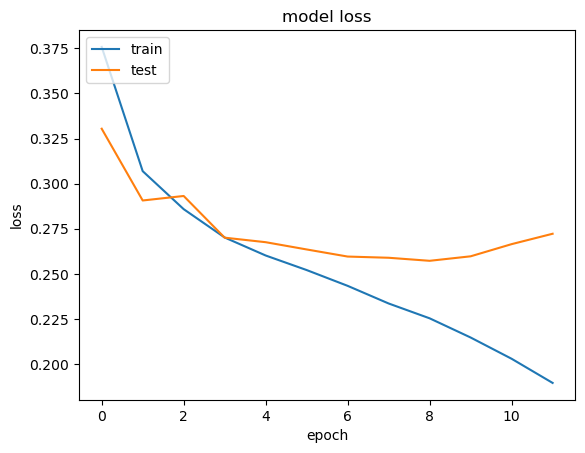

In [23]:
plt.plot(history_SCNN.history['loss'])
plt.plot(history_SCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 13s 191ms/step
0.7496580027359782
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       997
           1       0.78      0.68      0.73       551
           2       0.62      0.75      0.68       390
           3       0.51      0.80      0.62       201
           4       0.33      0.31      0.32        54

    accuracy                           0.75      2193
   macro avg       0.63      0.67      0.64      2193
weighted avg       0.78      0.75      0.76      2193

AlexNet
AUC: 0.9381
F1: 0.7225
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 08:57:16         7650
variables.h5                                   2023-04-29 08:57:16     14147744
metadata.json                                  2023-04-29 08:57:16           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>)

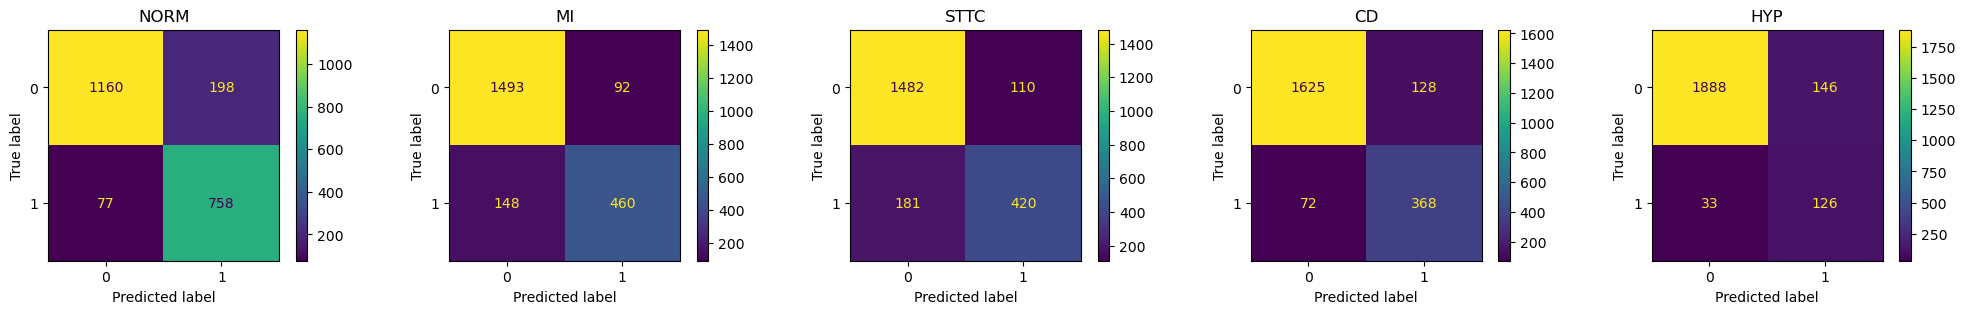

In [24]:
model_Alex = AlexNet()
model_Alex, history_Alex = buildModelWithInfo(model_Alex)
if os.path.isfile('/kaggle/input/models/history_Alex.pkl') == False:
    pickle.dump(history_Alex, open('/kaggle/input/models/history_Alex.pkl', 'wb'))
else:
    history_Alex = pickle.load(open('/kaggle/input/models/history_Alex.pkl', 'rb'))
models.append(model_Alex)

In [25]:
model_Alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1000, 96)          12768     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 500, 96)          0         
 1D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 500, 96)          384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 500, 96)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 256)          123136    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 250, 256)         0   

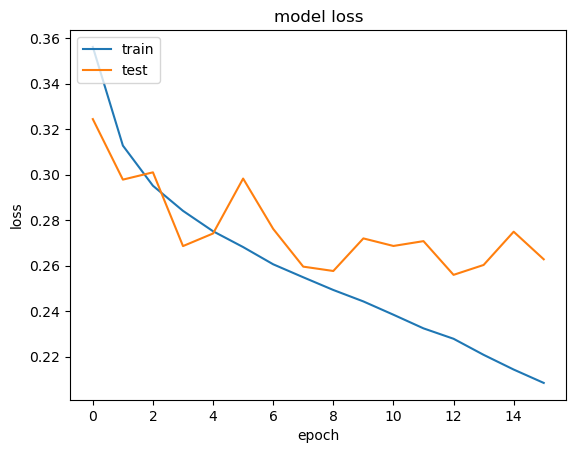

In [26]:
plt.plot(history_Alex.history['loss'])
plt.plot(history_Alex.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 166s 2s/step
0.7136342909256725
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       997
           1       0.88      0.51      0.64       551
           2       0.59      0.74      0.66       390
           3       0.43      0.85      0.57       201
           4       0.22      0.39      0.28        54

    accuracy                           0.71      2193
   macro avg       0.60      0.66      0.60      2193
weighted avg       0.78      0.71      0.73      2193

CBB
AUC: 0.9415
F1: 0.7241


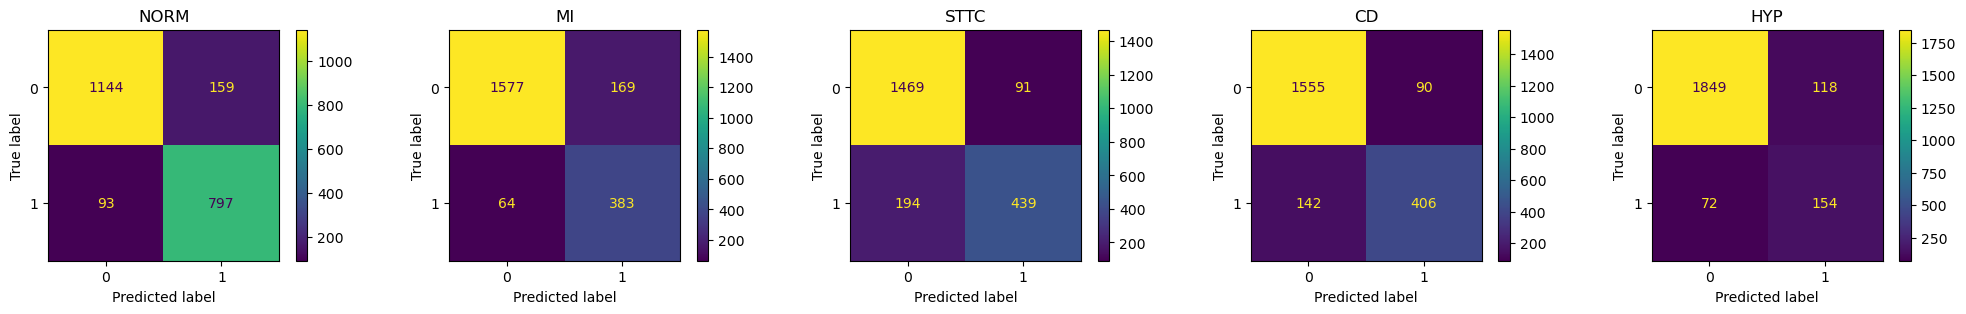

In [27]:
model_CBB = CBB()
model_CBB, history_CBB = buildModelWithInfo(model_CBB)
if os.path.isfile('/kaggle/input/models/history_CBB.pkl') == False:
    pickle.dump(history_CBB, open('/kaggle/input/models/history_CBB.pkl', 'wb'))
else:
    history_CBB = pickle.load(open('/kaggle/input/models/history_CBB.pkl', 'rb'))
models.append(model_CBB)

In [28]:
model_CBB.summary()

Model: "CBB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000, 12)]        0         
                                                                 
 conv1d_8 (Conv1D)           (None, 1000, 256)         34048     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 500, 256)         0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 500, 512)         1050624   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 500, 512)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 500, 1024)        3151872 

69/69 [==============================] - 12s 170ms/step
0.7533059735522116
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       997
           1       0.85      0.61      0.71       551
           2       0.61      0.74      0.67       390
           3       0.60      0.73      0.66       201
           4       0.21      0.46      0.29        54

    accuracy                           0.75      2193
   macro avg       0.63      0.68      0.64      2193
weighted avg       0.78      0.75      0.76      2193

Inception
AUC: 0.9403
F1: 0.7285
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 09:16:50        25036
variables.h5                                   2023-04-29 09:16:50      1537752
metadata.json                                  2023-04-29 09:16:50           64
Keras weights file (<HDF5 file "variables.h5" (mode r)

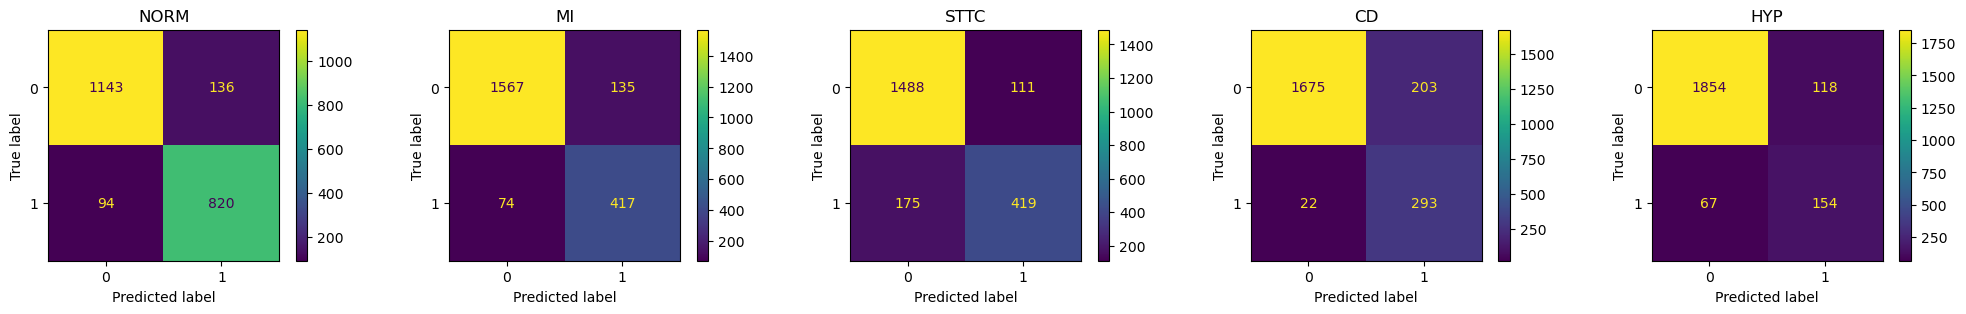

In [29]:
model_Inception = Inception()
model_Inception, history_Inception = buildModelWithInfo(model_Inception)
if os.path.isfile('/kaggle/input/models/history_Inception.pkl') == False:
    pickle.dump(history_Inception, open('/kaggle/input/models/history_Inception.pkl', 'wb'))
else:
    history_Inception = pickle.load(open('/kaggle/input/models/history_Inception.pkl', 'rb'))
models.append(model_Inception)

In [30]:
model_Inception.summary()

Model: "Inception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1000, 12)]   0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 1006, 12)    0           ['input_7[0][0]']                
                                                                                                  
 conv1d_11 (Conv1D)             (None, 1006, 64)     5440        ['zero_padding1d[0][0]']         
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 1006, 64)    256         ['conv1d_11[0][0]']              
 rmalization)                                                                             

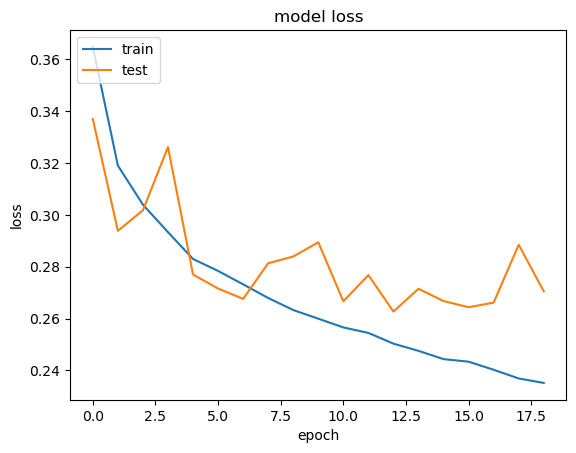

In [31]:
plt.plot(history_Inception.history['loss'])
plt.plot(history_Inception.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 58s 832ms/step
0.746922024623803
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       997
           1       0.84      0.60      0.70       551
           2       0.69      0.63      0.66       390
           3       0.49      0.81      0.61       201
           4       0.25      0.48      0.33        54

    accuracy                           0.75      2193
   macro avg       0.63      0.68      0.63      2193
weighted avg       0.78      0.75      0.75      2193

LSTM
AUC: 0.9385
F1: 0.7353
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 10:02:42         4201
variables.h5                                   2023-04-29 10:02:42      2509808
metadata.json                                  2023-04-29 10:02:42           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loa

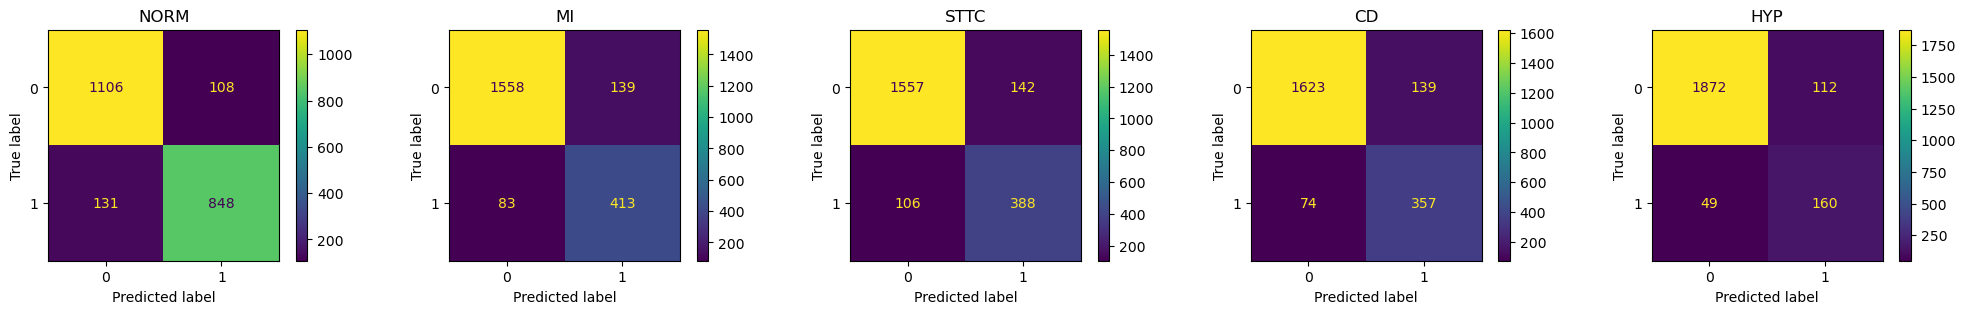

In [32]:
model_LSTM = L()
model_LSTM, history_LSTM = buildModelWithInfo(model_LSTM)
if os.path.isfile('/kaggle/input/models/history_LSTM.pkl') == False:
    pickle.dump(history_LSTM, open('/kaggle/input/models/history_LSTM.pkl', 'wb'))
else:
    history_LSTM = pickle.load(open('/kaggle/input/models/history_LSTM.pkl', 'rb'))
models.append(model_LSTM)

In [33]:
model_LSTM.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1000, 128)         72192     
                                                                 
 dropout_3 (Dropout)         (None, 1000, 128)         0         
                                                                 
 lstm_4 (LSTM)               (None, 1000, 128)         131584    
                                                                 
 dropout_4 (Dropout)         (None, 1000, 128)         0         
                                                                 
 global_average_pooling1d_7   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                              

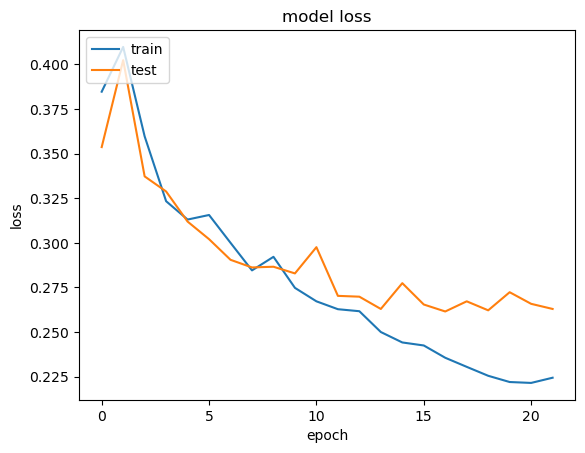

In [34]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 44s 630ms/step
0.729594163246694
              precision    recall  f1-score   support

           0       0.89      0.83      0.85       997
           1       0.80      0.65      0.72       551
           2       0.68      0.58      0.63       390
           3       0.51      0.82      0.63       201
           4       0.17      0.50      0.25        54

    accuracy                           0.73      2193
   macro avg       0.61      0.67      0.62      2193
weighted avg       0.78      0.73      0.74      2193

GRU
AUC: 0.9353
F1: 0.7265
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 10:13:18         3068
variables.h5                                   2023-04-29 10:13:18      2549232
metadata.json                                  2023-04-29 10:13:18           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) load

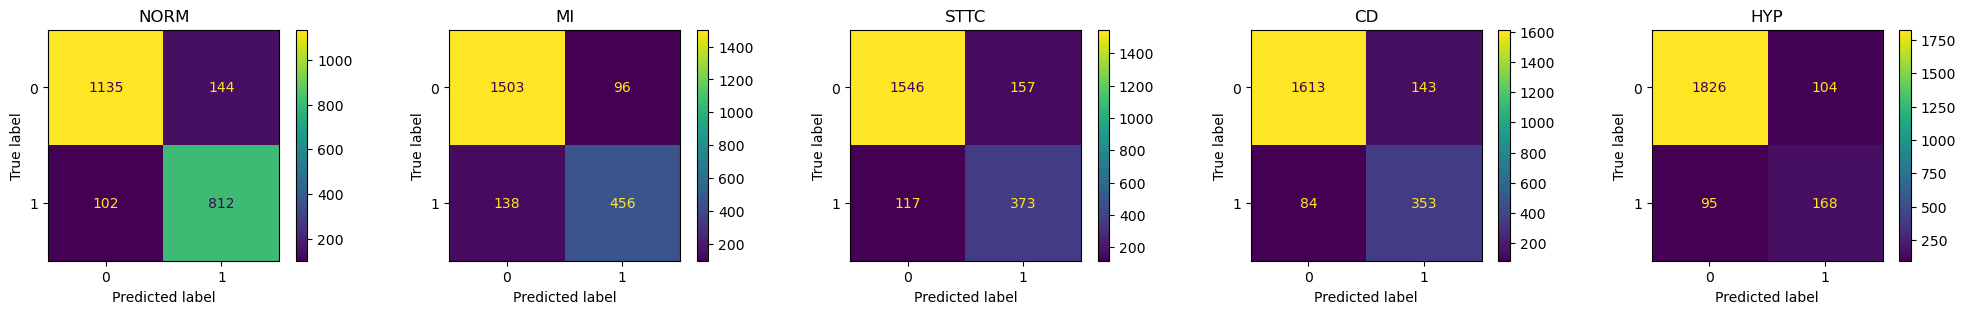

In [35]:
model_GRU = G()
model_GRU, history_GRU = buildModelWithInfo(model_GRU)
if os.path.isfile('/kaggle/input/models/history_GRU.pkl') == False:
    pickle.dump(history_GRU, open('/kaggle/input/models/history_GRU.pkl', 'wb'))
else:
    history_GRU = pickle.load(open('/kaggle/input/models/history_GRU.pkl', 'rb'))
models.append(model_GRU)

In [36]:
model_GRU.summary()

Model: "GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 1000, 256)         207360    
                                                                 
 global_average_pooling1d_8   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 208,645
Trainable params: 208,645
Non-trainable params: 0
_________________________________________________________________


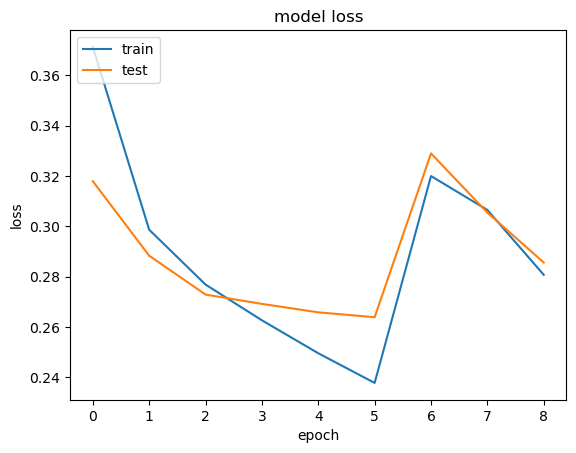

In [37]:
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 134s 2s/step
0.7346101231190151
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       997
           1       0.82      0.59      0.69       551
           2       0.59      0.69      0.64       390
           3       0.56      0.79      0.65       201
           4       0.19      0.35      0.25        54

    accuracy                           0.73      2193
   macro avg       0.61      0.65      0.62      2193
weighted avg       0.77      0.73      0.74      2193

LG
AUC: 0.9318
F1: 0.7229
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 10:43:06         3899
variables.h5                                   2023-04-29 10:43:06     12256760
metadata.json                                  2023-04-29 10:43:06           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loadin

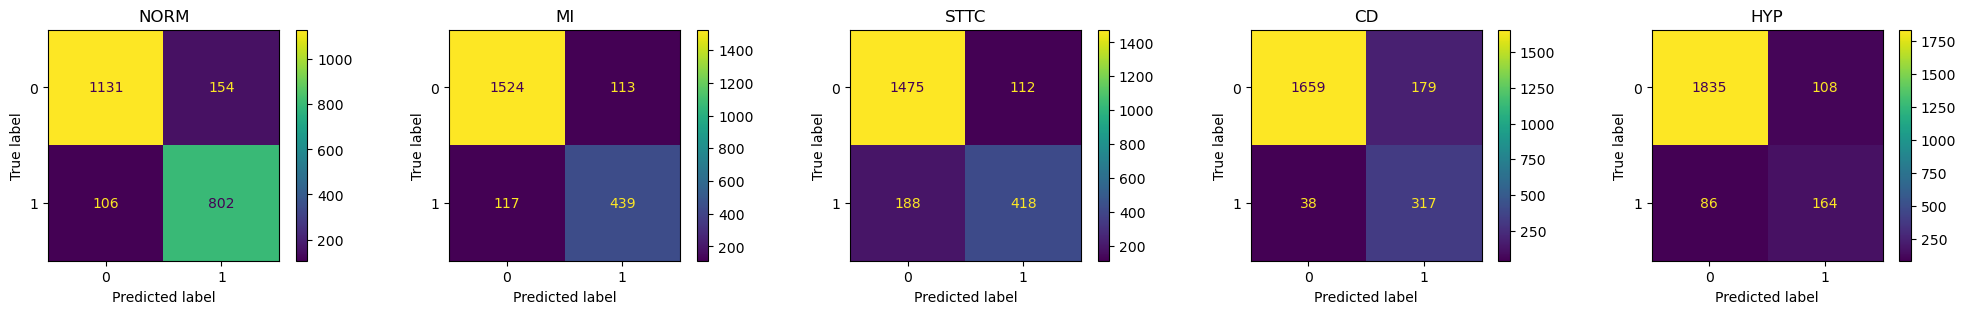

In [38]:
model_LSTMGRU = LG()
model_LSTMGRU, history_LSTMGRU = buildModelWithInfo(model_LSTMGRU)
if os.path.isfile('/kaggle/input/models/history_LSTMGRU.pkl') == False:
    pickle.dump(history_LSTMGRU, open('/kaggle/input/models/history_LSTMGRU.pkl', 'wb'))
else:
    history_LSTMGRU = pickle.load(open('/kaggle/input/models/history_LSTMGRU.pkl', 'rb'))
models.append(model_LSTMGRU)

In [39]:
model_LSTMGRU.summary()

Model: "LG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1000, 256)         275456    
                                                                 
 gru_4 (GRU)                 (None, 1000, 384)         739584    
                                                                 
 global_average_pooling1d_9   (None, 384)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 5)                 1925      
                                                                 
Total params: 1,016,965
Trainable params: 1,016,965
Non-trainable params: 0
_________________________________________________________________


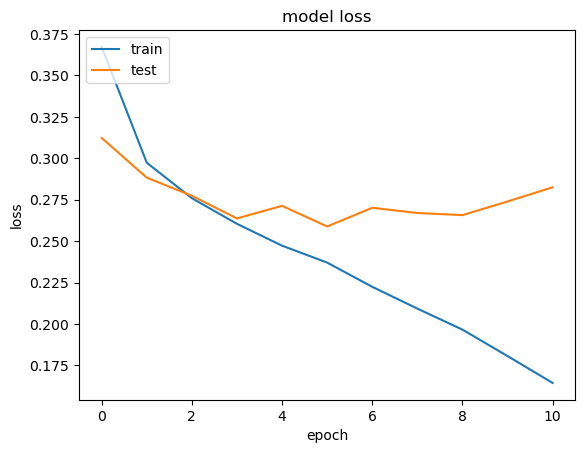

In [40]:
plt.plot(history_LSTMGRU.history['loss'])
plt.plot(history_LSTMGRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 21s 295ms/step
0.7409940720474236
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       997
           1       0.85      0.58      0.69       551
           2       0.63      0.71      0.67       390
           3       0.44      0.79      0.57       201
           4       0.26      0.19      0.22        54

    accuracy                           0.74      2193
   macro avg       0.61      0.62      0.60      2193
weighted avg       0.77      0.74      0.74      2193

VGG16
AUC: 0.9368
F1: 0.7333
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 10:54:44        19419
variables.h5                                   2023-04-29 10:54:44     46683608
metadata.json                                  2023-04-29 10:54:44           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) l

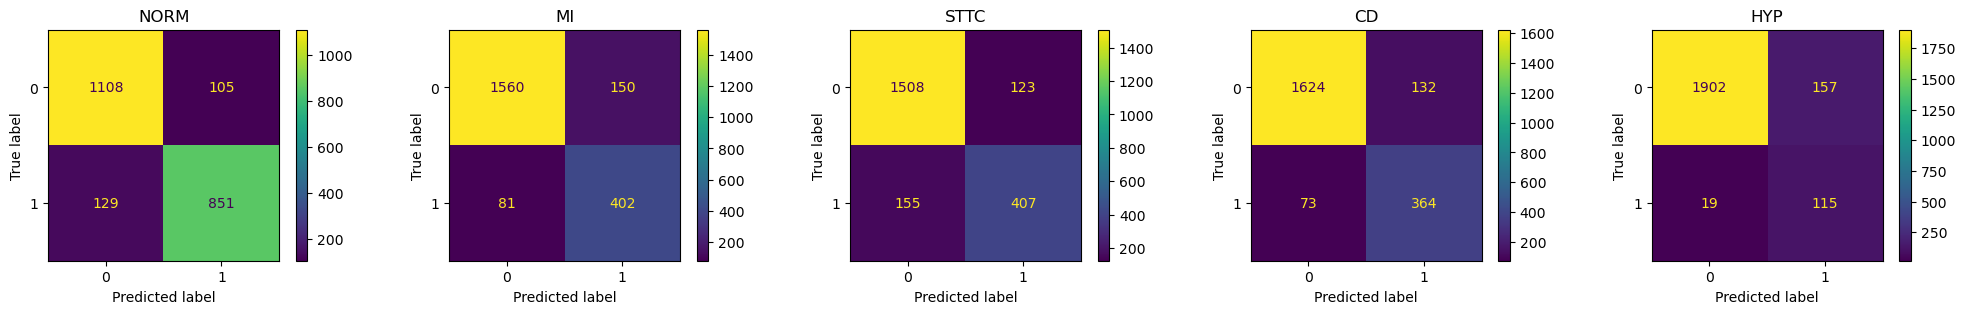

In [41]:
model_VGG16 = VGG16()
model_VGG16, history_VGG16 = buildModelWithInfo(model_VGG16)
if os.path.isfile('/kaggle/input/models/history_VGG16.pkl') == False:
    pickle.dump(history_VGG16, open('/kaggle/input/models/history_VGG16.pkl', 'wb'))
else:
    history_VGG16 = pickle.load(open('/kaggle/input/models/history_VGG16.pkl', 'rb'))
models.append(model_VGG16)

In [42]:
model_VGG16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 1000, 64)          2368      
                                                                 
 batch_normalization_17 (Bat  (None, 1000, 64)         256       
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 1000, 64)          0         
                                                                 
 conv1d_26 (Conv1D)          (None, 1000, 64)          12352     
                                                                 
 batch_normalization_18 (Bat  (None, 1000, 64)         256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 1000, 64)          0     

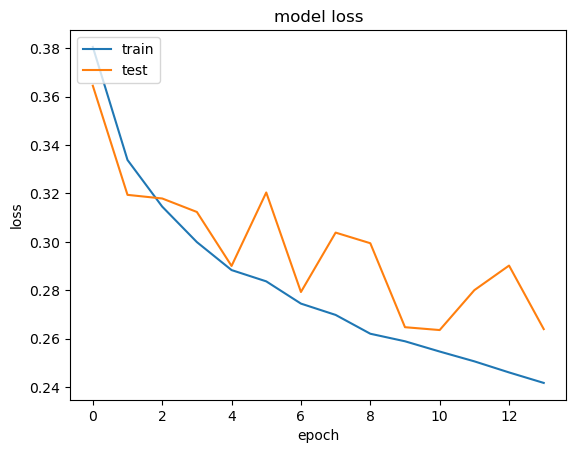

In [43]:
plt.plot(history_VGG16.history['loss'])
plt.plot(history_VGG16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

69/69 [==============================] - 54s 748ms/step
0.6963064295485636
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       997
           1       0.76      0.60      0.67       551
           2       0.64      0.64      0.64       390
           3       0.46      0.77      0.58       201
           4       0.16      0.56      0.24        54

    accuracy                           0.70      2193
   macro avg       0.58      0.67      0.59      2193
weighted avg       0.76      0.70      0.72      2193

Xception
AUC: 0.9301
F1: 0.7057
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-29 11:12:50        76631
variables.h5                                   2023-04-29 11:12:50    248706848
metadata.json                                  2023-04-29 11:12:50           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>

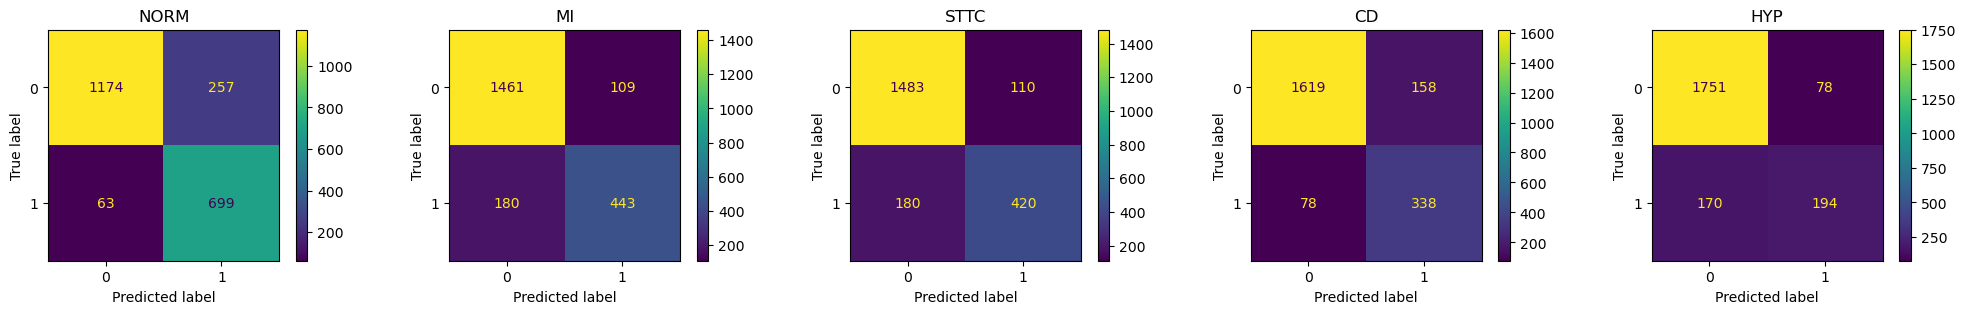

In [44]:
model_X = Xception()
model_X, history_Xception = buildModelWithInfo(model_X)
if os.path.isfile('/kaggle/input/models/history_Xception.pkl') == False:
    pickle.dump(history_Xception, open('/kaggle/input/models/history_Xception.pkl', 'wb'))
else:
    history_Xception = pickle.load(open('/kaggle/input/models/history_Xception.pkl', 'rb'))
models.append(model_X)

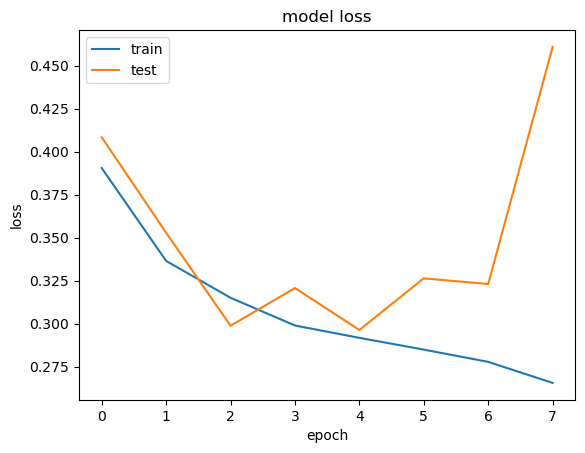

In [45]:
plt.plot(history_Xception.history['loss'])
plt.plot(history_Xception.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
if normalization and randomSplit:
    print('With Normalization and Random split')
elif normalization:
    print('With Normalization and Custom split')
elif randomSplit:
    print('Without Normalization and Random split')
else:
    print('Without Normalization and Custom split')
for result in results:
    print('AUC: '+'%.4f' %result[1][0]+' F1: '+'%.4f' %result[1][1]+' on '+result[0])

With Normalization and Custom split
AUC: 0.9363 F1: 0.7309 on CNN
AUC: 0.9390 F1: 0.7292 on SCNN
AUC: 0.9381 F1: 0.7225 on AlexNet
AUC: 0.9415 F1: 0.7241 on CBB
AUC: 0.9403 F1: 0.7285 on Inception
AUC: 0.9385 F1: 0.7353 on LSTM
AUC: 0.9353 F1: 0.7265 on GRU
AUC: 0.9318 F1: 0.7229 on LG
AUC: 0.9368 F1: 0.7333 on VGG16
AUC: 0.9301 F1: 0.7057 on Xception


69/69 [==============================] - 56s 810ms/step


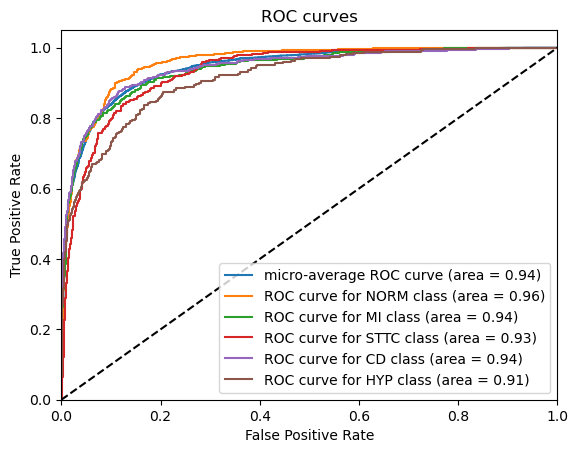

69/69 [==============================] - 46s 668ms/step


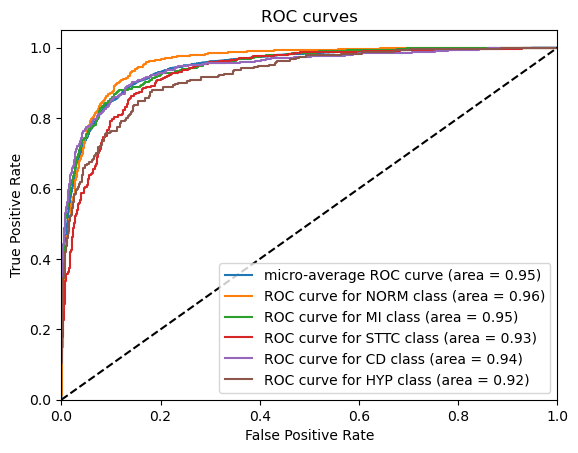

69/69 [==============================] - 13s 191ms/step


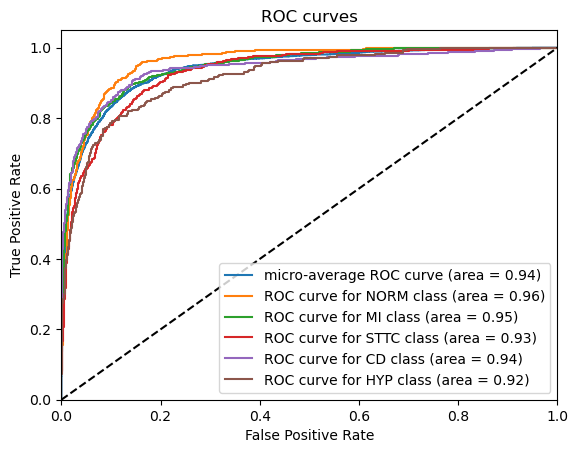

69/69 [==============================] - 164s 2s/step


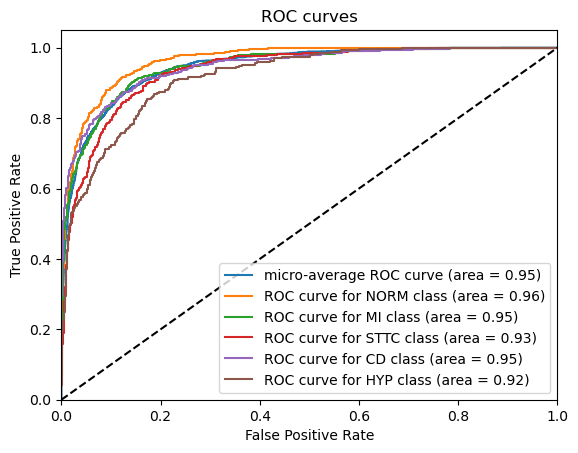

69/69 [==============================] - 11s 165ms/step


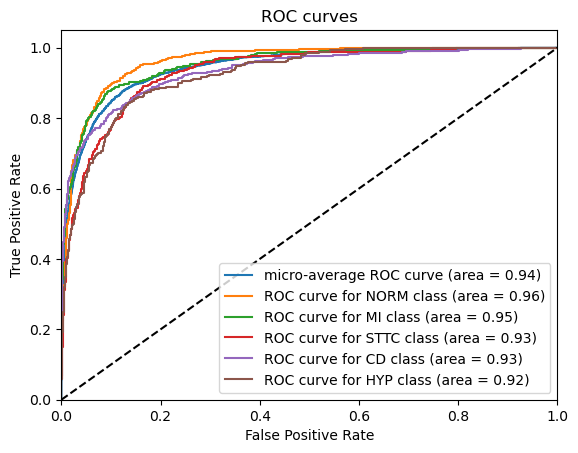

69/69 [==============================] - 58s 833ms/step


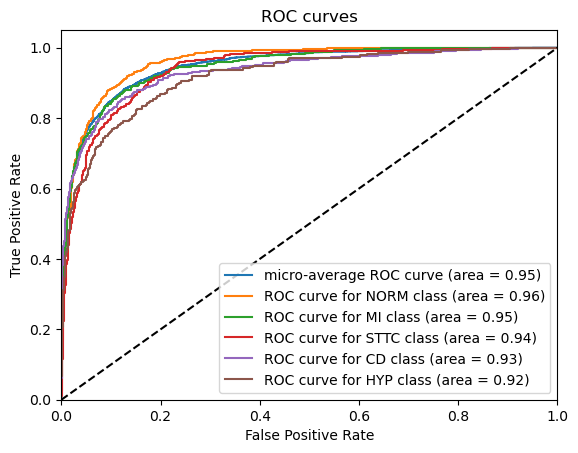

69/69 [==============================] - 45s 648ms/step


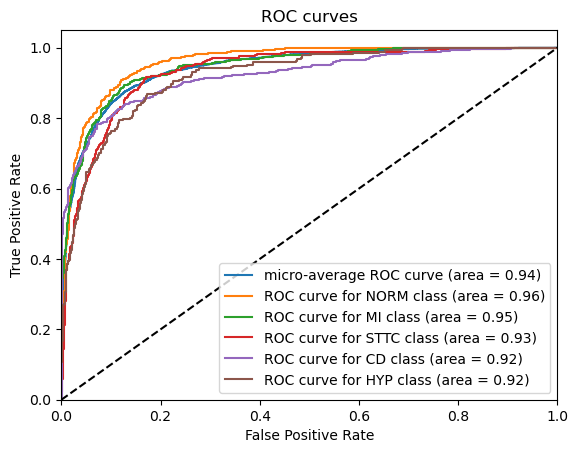

69/69 [==============================] - 131s 2s/step


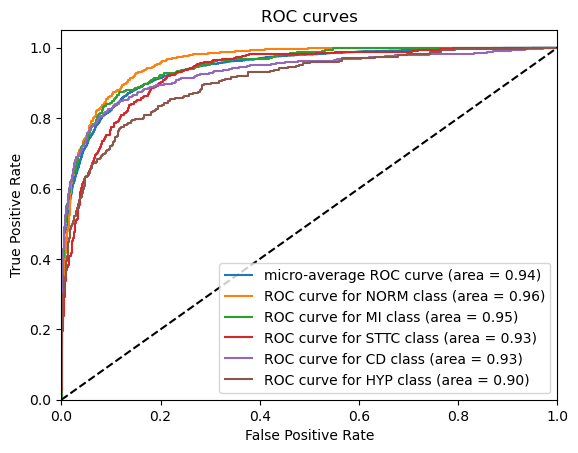

69/69 [==============================] - 21s 299ms/step


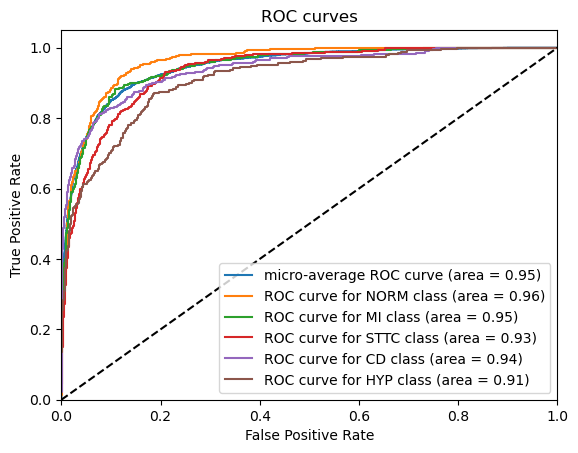

69/69 [==============================] - 51s 736ms/step


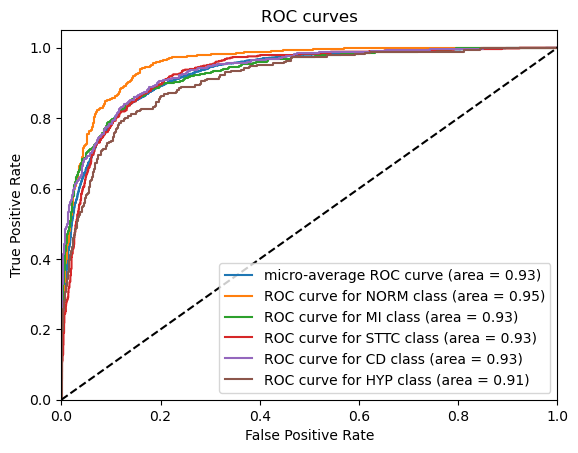

In [47]:
for model in models:
    Ypred = model.predict(Xtest)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(numClasses):
        fpr[i], tpr[i], _ = roc_curve(Ytest[:, i], Ypred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Ytest.ravel(), Ypred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]))
    for i in range(numClasses):
        plt.plot(fpr[i], tpr[i], label='ROC curve for {0} class (area = {1:0.2f})'''.format(subClasses[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.show()

In [48]:
predictions = []

**Ensemble**

In [49]:
for model in models:
    if model._name in ('VGG16', 'AlexNet','LSTM'):
        predictions.append(model.predict(Xtest))

69/69 [==============================] - 20s 295ms/step


In [50]:
print(predictions)

[array([[5.1047123e-04, 3.5383869e-06, 1.4859859e-06, 4.3453033e-06,
        3.8146683e-07],
       [5.9282560e-05, 2.6188178e-03, 1.5224079e-03, 3.9291821e-02,
        1.9294568e-04],
       [8.5563181e-05, 4.1974263e-06, 8.1210379e-07, 6.2164459e-06,
        2.3003552e-06],
       ...,
       [3.0510055e-05, 9.5326382e-01, 9.1471046e-01, 7.2055411e-01,
        8.5786748e-01],
       [7.0121983e-04, 7.3035359e-01, 1.5551025e-01, 8.8842595e-01,
        1.4331639e-01],
       [1.4075283e-04, 7.1325856e-01, 9.6712315e-01, 5.8253491e-01,
        4.2878577e-01]], dtype=float32), array([[9.7251014e-04, 1.3208960e-03, 3.9478956e-04, 3.5789609e-03,
        2.1445847e-03],
       [4.6929275e-03, 7.2442838e-03, 4.2260955e-03, 1.1118074e-01,
        1.3356932e-02],
       [4.0745447e-04, 2.0217192e-03, 9.8561612e-04, 1.0658539e-03,
        2.2046883e-03],
       ...,
       [6.3965628e-05, 9.8339558e-01, 6.8585455e-01, 9.7780186e-01,
        8.3988255e-01],
       [9.1516721e-04, 5.5227143e-01, 

In [51]:
predictions = np.array(predictions)

In [52]:
predictions.shape

(3, 2193, 5)

In [53]:
total_predict = np.zeros((2193,5))

In [54]:
for predict in predictions:
    total_predict = total_predict + predict

total_predict = total_predict/len(predictions)


y_pred=np.argmax(total_predict, axis=1)

In [55]:
print(Ytest.shape)

(2193, 5)


In [56]:
y_test=np.argmax(Ytest, axis=1)


In [57]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print('AUC:', roc_auc_score(Ytest, total_predict))
print('F1 score:', f1_score(y_test,y_pred, average ='micro'))
print('Recall Score:', recall_score(y_test, y_pred, average = 'micro'))
print('Precision:', precision_score(y_test, y_pred, average='micro'))

Accuracy: 0.7660738714090287
AUC: 0.9481397282386798
F1 score: 0.7660738714090287
Recall Score: 0.7660738714090287
Precision: 0.7660738714090287


**ECG Image Classification**

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import os
from IPython.display import FileLink

# Download the ECG data
ecg_data = []


time = range(1000)
for i in range(len(Xtrain)):
    lead_I = []
    lead_II = []
    lead_III = []
    for j in range(len(Xtrain[0])):
        lead_I.append(Xtrain[i][j][0])
        lead_II.append(Xtrain[i][j][1])
        lead_III.append(Xtrain[i][j][2])
        
    lead_I = np.array(lead_I)
    lead_II = np.array(lead_II)
    lead_III = np.array(lead_III)

# Calculate the Einthoven's limb leads (aVR, aVL, aVF)
    lead_aVR = -(lead_I + lead_II) / 2.0
    lead_aVL = (lead_I - lead_III) / 2.0
    lead_aVF = (lead_II + lead_III) / 2.0

# Combine the leads to form the Einthoven's triangle
    einthoven_triangle = lead_I + lead_II + lead_III
    ecg_data.append(einthoven_triangle)

ecg_data = np.array(ecg_data)


In [59]:
if os.path.isdir('/kaggle/input/ecg-images/') == False:
    for j in range(len(Xtrain)):
        plt.plot(time, ecg_data[j])
        plt.xticks([]) 
        plt.yticks([]) 
        plt.box(False)


    # Save the plot as an image
        img_filename = 'ecg_signal'+str(j)+'.png'
        plt.savefig(img_filename, dpi=32)

    # Download the image file
        link = str(FileLink(img_filename))
        print(link)
        plt.figure().clear()
        plt.close()
        plt.cla()
        plt.clf()

# Delete the local instances of the data and plot image files
#os.remove(img_filename)

In [3]:
# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:25:40.726303Z","iopub.execute_input":"2023-04-28T21:25:40.726905Z","iopub.status.idle":"2023-04-28T21:25:51.293543Z","shell.execute_reply.started":"2023-04-28T21:25:40.726851Z","shell.execute_reply":"2023-04-28T21:25:51.292047Z"}}
#all the imports
import numpy as np
import gzip
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import gc
from sklearn import preprocessing
import pickle
import tarfile
from keras.models import Sequential, load_model
from keras.datasets import cifar10
import keras  
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense, Input, GlobalAveragePooling2D, ZeroPadding2D, Activation
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras import optimizers 
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

import os

# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:25:51.304084Z","iopub.execute_input":"2023-04-28T21:25:51.304537Z","iopub.status.idle":"2023-04-28T21:25:51.315826Z","shell.execute_reply.started":"2023-04-28T21:25:51.304482Z","shell.execute_reply":"2023-04-28T21:25:51.314468Z"}}
from PIL import Image


# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:25:54.393514Z","iopub.execute_input":"2023-04-28T21:25:54.394359Z","iopub.status.idle":"2023-04-28T21:25:54.400370Z","shell.execute_reply.started":"2023-04-28T21:25:54.394302Z","shell.execute_reply":"2023-04-28T21:25:54.398963Z"}}
images = []

# %% [code]


# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:25:56.740996Z","iopub.execute_input":"2023-04-28T21:25:56.741544Z","iopub.status.idle":"2023-04-28T21:25:56.828230Z","shell.execute_reply.started":"2023-04-28T21:25:56.741462Z","shell.execute_reply":"2023-04-28T21:25:56.826906Z"}}
import imageio as iio
 

# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:26:40.805581Z","iopub.execute_input":"2023-04-28T21:26:40.806024Z","iopub.status.idle":"2023-04-28T21:28:36.351727Z","shell.execute_reply.started":"2023-04-28T21:26:40.805987Z","shell.execute_reply":"2023-04-28T21:28:36.350021Z"}}


In [20]:
for i in range(Xtrain.shape[0]):
    if os.path.exists('/kaggle/input/ecg-images/ecg_signal'+str(i)+'.png'):
        images.append(np.array(Image.open('/kaggle/input/ecg-images/ecg_signal'+str(i)+'.png')))

# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:28:39.836360Z","iopub.execute_input":"2023-04-28T21:28:39.837126Z","iopub.status.idle":"2023-04-28T21:28:43.805957Z","shell.execute_reply.started":"2023-04-28T21:28:39.837083Z","shell.execute_reply":"2023-04-28T21:28:43.804722Z"}}


In [21]:
images[0].shape

(288, 432, 4)

In [ ]:
images = np.array(images)
images.shape

# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:30:38.870589Z","iopub.execute_input":"2023-04-28T21:30:38.871253Z","iopub.status.idle":"2023-04-28T21:30:38.876152Z","shell.execute_reply.started":"2023-04-28T21:30:38.871203Z","shell.execute_reply":"2023-04-28T21:30:38.874774Z"}}
images = images[:, :, :, :3]


# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:31:09.027700Z","iopub.execute_input":"2023-04-28T21:31:09.028357Z","iopub.status.idle":"2023-04-28T21:31:09.034760Z","shell.execute_reply.started":"2023-04-28T21:31:09.028315Z","shell.execute_reply":"2023-04-28T21:31:09.033301Z"}}
images.shape

# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:30:56.331994Z","iopub.execute_input":"2023-04-28T21:30:56.332444Z","iopub.status.idle":"2023-04-28T21:30:56.604800Z","shell.execute_reply.started":"2023-04-28T21:30:56.332404Z","shell.execute_reply":"2023-04-28T21:30:56.603463Z"}}
plt.imshow(images[0])
plt.show()

# %% [code]

# %% [code] {"execution":{"iopub.status.busy":"2023-04-28T21:31:14.706914Z","iopub.execute_input":"2023-04-28T21:31:14.707335Z","iopub.status.idle":"2023-04-28T21:31:17.606005Z","shell.execute_reply.started":"2023-04-28T21:31:14.707296Z","shell.execute_reply":"2023-04-28T21:31:17.604460Z"}}
model_vgg16 = VGG16(input_shape=(153, 204, 3), include_top=False, weights='imagenet')
model = Sequential()
model.add(model_vgg16)
model.layers[0].trainable = False
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))



# %% [code]


In [ ]:
images.shape

In [79]:
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy',AUC(name="AUC",multi_label=True),F1Score(numClasses,"micro",name="F1")])


In [80]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               1572992   
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 5)                 325       
                                                                 
Total params: 16,296,261
Trainable params: 1,581,573
Non-trainable params: 14,714,688
_________________________________________________________________


In [81]:
import gc
gc.collect()

8236

In [ ]:
history = model.fit(images, Ytrain, batch_size=64, epochs=10, validation_split=0.2, callbacks=[keras.callbacks.ModelCheckpoint("vgg16.h5")])

In [2]:
model.save('images_cnn.h5')

NameError: name 'model' is not defined

In [ ]:
from keras.applications import EfficientNetB0

model_effecientNet = EfficientNetB0(input_shape=(153, 204, 3), include_top=False, weights='imagenet')
model = Sequential()
model.add(model_effecientNet)
model.layers[0].trainable = True
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy',AUC(name="AUC",multi_label=True),F1Score(numClasses,"micro",name="F1")])

In [ ]:
Ytrain

In [ ]:
history = model.fit(images, Ytrain, batch_size=128, epochs=10, validation_split=0.2)

In [ ]:
model.save('images_effecientnet.h5')